In [38]:
import networkx as nx
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
from networkx.algorithms import community
import pickle
import csv
import itertools
#import chart_studio.plotly as py
#from plotly.graph_objs import *
import re
import string
#from textblob import TextBlob
#import preprocessor as p
#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
#from nltk.corpus import reuters
data = pd.read_csv('all_hashtags_combined.csv')

In [39]:
#df = pd.read_csv('/content/all_hashtags_combined.csv') 

In [40]:
G = nx.read_gpickle("Our_Gragh_0.4Sim")


In [41]:
def quick_summary_of_subgraph(G, data):
    tweets = data[data['user_id'].isin(G.nodes())]
    
    word_count = {}
    for t in tweets.text:
        if type(t) == str:
            parts = t.split(' ')
            for p in parts:
                value = word_count.get(p, None)
                if value == None:
                    word_count[p] = 1
                else:
                    word_count[p] = value + 1
                
    loc_count = {}            
    for userid in G.nodes():
        loc = data[data['user_id'] == userid].location.iloc[0]
        value = loc_count.get(loc, None)
        if value == None:
            loc_count[loc] = 1
        else:
            loc_count[loc] = value + 1
            
    ht_count = {}
    for ht in tweets.tweet_hashtags:
        if type(ht) == str:
            parts = ht.split(' ')
            for p in parts:
                value = ht_count.get(p, None)
                if value == None:
                    ht_count[p] = 1
                else:
                    ht_count[p] = value + 1
        
    print("### WORDS PRESENT IN USERS' TWEETS SORTED BY OCCURRENCE COUNT (ONLY THE WORDS WITH COUNT > 1) ###")
    wordsort = sorted(word_count.items(), key=(lambda k: k[1]), reverse=True)
    print({k: v for k,v in wordsort if v > 1})
    
    print("\n### LOCATIONS PRESENT IN USERS' TWEETS SORTED BY OCCURRENCE COUNT ###")
    print(sorted(loc_count.items(), key=(lambda k: k[1]), reverse=True))
    
    print("\n### HASHTAG OCCURENCES (ONLY THE HASHTAGS WITH COUNT > 1) ###")
    htsort = sorted(ht_count.items(), key=(lambda k: k[1]), reverse=True)
    print({k: v for k,v in htsort if v > 1})
    
    print("\n### TWEETS ###")
    display(tweets)
    
def get_labels(G, data):
    labels = {}
    for n in G.nodes():
        labels[n] = data[data['user_id'] == n].username.iloc[0]
    return labels

### WORDS PRESENT IN USERS' TWEETS SORTED BY OCCURRENCE COUNT (ONLY THE WORDS WITH COUNT > 1) ###
{'car': 401, 'park': 298, '': 288, 'parking': 270, 'free': 130, 's': 108, 'spaces': 89, 'new': 89, 'private': 85, 'painting': 75, 'get': 66, 'charges': 62, 'space': 60, 'could': 57, 'amp': 55, 'city': 52, 'unfair': 49, 'surface': 47, 'invoices': 47, 'fight': 42, 'line': 41, 'repainting': 40, 'us': 40, 'marking': 38, 'staff': 36, 'street': 35, 'fines': 35, 'need': 34, 'book': 34, 'fine': 33, 'lining': 33, 'nt': 33, 'saturday': 33, 'one': 32, 'people': 31, 'centre': 30, 'cars': 29, 'prebook': 29, 'plans': 28, 'town': 28, 'make': 27, 'permits': 27, 'look': 27, 'parks': 26, 'public': 26, 'would': 25, 'time': 25, 'still': 25, '2020': 25, 'permit': 25, 'operators': 24, 'year': 24, 'speculative': 24, 'drivers': 24, 'york': 24, 'best': 23, 'pavement': 23, 'charge': 23, 'operator': 23, 'residents': 22, 'airport': 22, 'find': 22, 'council': 22, 'use': 22, 'scheme': 21, 'like': 21, 'set': 21, 'issued

,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
0,2020-04-11 11:37:20,175351371,PSRltd,work £250000 improvement plan parked trust app...,0,0,#mull #iona #community #argyll #bute #council ...,0161 401 4000,175351371
17,2020-04-11 00:10:02,1194310568200548352,Toon_Dreessen,yes move last big na city put,4,11,#ottcity #people #parking,"ottawa, on",1194310568200548352
28,2020-04-10 19:12:18,1706248454,dkmounts,looking parking space board parking spaces ava...,0,0,#skateboard #longboard #electricboard #parking...,oc california,1706248454
32,2020-04-10 18:13:15,780011379528962048,markingcontract,car park repainting nottinghamshire,0,0,#car #parking #bay #relining #nottinghamshire,united kingdom,780011379528962048
48,2020-04-10 15:13:20,780011379528962048,markingcontract,car park painting netherthird,0,0,#parking #bay #colour #coating #netherthird,united kingdom,780011379528962048
51,2020-04-10 14:44:17,175351371,PSRltd,charges suspended,0,0,#fife #parking,0161 401 4000,175351371
56,2020-04-10 13:58:17,175351371,PSRltd,calls residents help key workers buddy scheme,0,0,#portsmouth #parking,0161 401 4000,175351371
59,2020-04-10 13:45:45,1194310568200548352,Toon_Dreessen,many cities making last hold,12,17,#places #people #parking #ottcity,"ottawa, on",1194310568200548352
61,2020-04-10 13:29:32,308830214,uspackage,need best parking sport airport,0,0,#parking,"norcross, ga",308830214
62,2020-04-10 13:27:39,308830214,uspackage,best airport parking,0,0,#parking,"norcross, ga",308830214


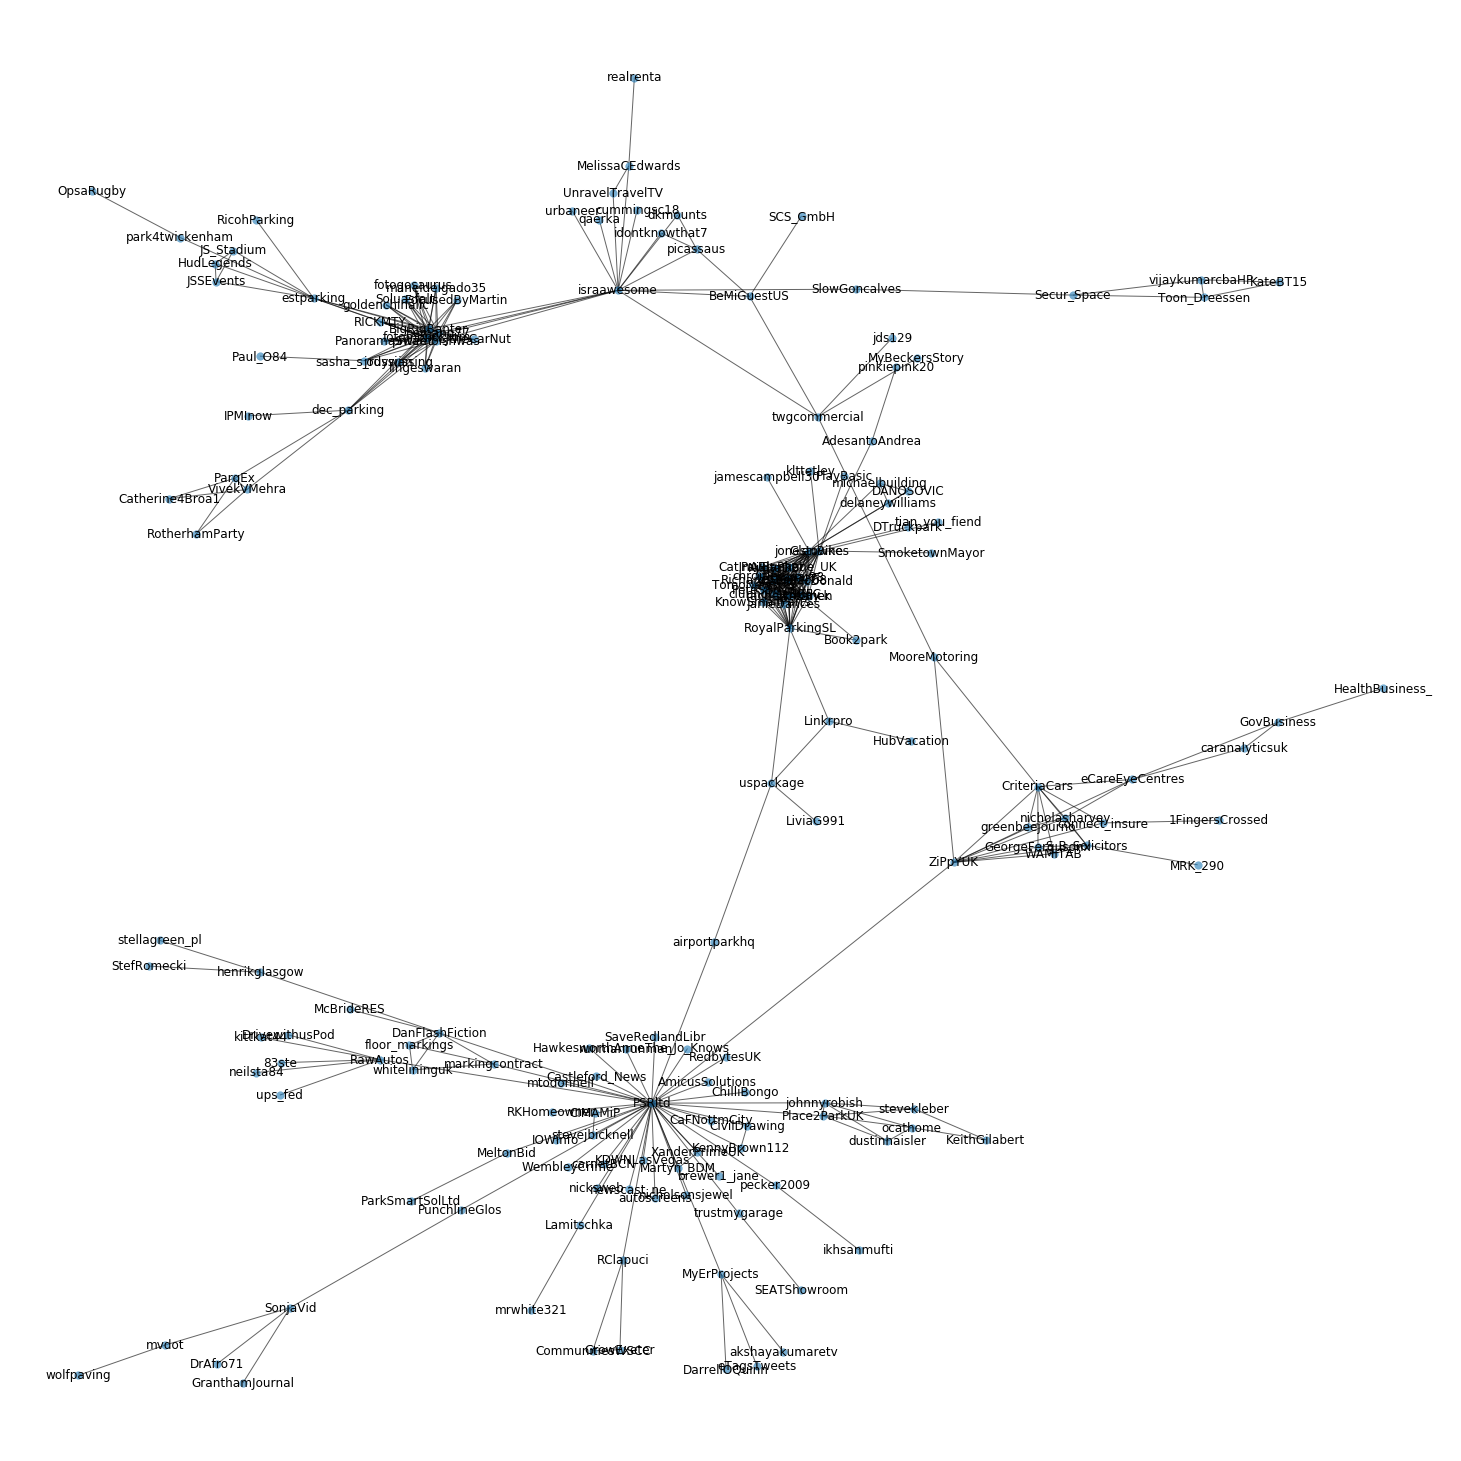

In [43]:
#Largest subgraph in the graph
largest_subgraph = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])

labels = {}
for n in largest_subgraph.nodes():
    labels[n] = data[data['user_id'] == n].username.iloc[0]

plt.figure(figsize = (20,20))
pos = nx.spring_layout(largest_subgraph)
nx.draw(largest_subgraph, pos=pos, edge_color="black", linewidths=0.3, node_size=60,
        alpha=0.6, with_labels=False)
nx.draw_networkx_labels(largest_subgraph, pos=pos, labels=labels)
plt.savefig('largest_subgraph.png')
quick_summary_of_subgraph(largest_subgraph, data)

In [44]:
sorted(G.degree, key=lambda x: x[1], reverse=True)

[(175351371, 40),
 (1522183322, 33),
 (332156688, 33),
 (2572271892, 33),
 (860538705056083970, 33),
 (947440675489906688, 33),
 (450515554, 33),
 (3255544019, 33),
 (3017860446, 33),
 (1210276287278796800, 33),
 (1652075268, 33),
 (3001390075, 33),
 (1171789465162932224, 33),
 (124517092, 33),
 (2168195778, 33),
 (1158989223044603904, 33),
 (490012948, 32),
 (1136495538751397888, 28),
 (917297369263362049, 28),
 (1155829585772261377, 27),
 (1111675390324404224, 27),
 (858735005006213122, 27),
 (447695333, 27),
 (1109174739669401602, 27),
 (802178510207025152, 27),
 (536262371, 26),
 (526184989, 26),
 (922999217160720384, 24),
 (88129814, 23),
 (1970293994, 23),
 (386758844, 23),
 (98326125, 23),
 (1232155497203216385, 22),
 (953069401, 21),
 (1590405854, 19),
 (1195054295999074304, 19),
 (1873524348, 19),
 (1056062613237379072, 18),
 (4221335577, 18),
 (3278856079, 18),
 (1021114506, 18),
 (77474340, 18),
 (17154051, 18),
 (1216397170531872768, 18),
 (121707270, 18),
 (436714561, 18),

In [45]:
# 3 different Cliques
cliqs = list(nx.find_cliques(G)) # All cliques
cliqs = sorted(cliqs, key=len, reverse=True) # Sort from largest to smallest

In [46]:
len(cliqs) # How many cliques found

312

In [47]:
# Checking clique sizes from largest to smallest
for c in cliqs:
    print(len(c))

22
22
22
21
20
19
19
18
15
15
14
14
13
13
12
12
11
11
10
9
7
7
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [48]:
clique_1st_graph = G.subgraph(cliqs[0]) # Largest clique
clique_2nd_graph = G.subgraph(cliqs[4]) # Second largest
clique_3rd_graph = G.subgraph(cliqs[10]) # Third largest

### WORDS PRESENT IN USERS' TWEETS SORTED BY OCCURRENCE COUNT (ONLY THE WORDS WITH COUNT > 1) ###
{'6': 22, 'cars': 22, '': 16, 'join': 16, 'ans': 4, 'total': 2}

### LOCATIONS PRESENT IN USERS' TWEETS SORTED BY OCCURRENCE COUNT ###
[(nan, 3), ('indore, india', 2), ('hyderabad, india', 2), ('ranchi, india', 1), ('kolkata, india', 1), ('मुंबई, भारत', 1), ('rajasthan, india', 1), ('indai', 1), ('देवघर ', 1), ('delhi ncr', 1), ('kollam, india', 1), ('ahmedabad', 1), ('mumbai', 1), ('mumbai, india', 1), ('india', 1), ('aurangabad, india', 1), ('kolkata', 1), ('karnal, haryana', 1)]

### HASHTAG OCCURENCES (ONLY THE HASHTAGS WITH COUNT > 1) ###
{'#parkwheels': 22, '#parking': 22, '#challenge': 22, '#contestalert': 16, '#puzzle': 10, '#findthecar': 10, '#findpuzzle': 10, '#contest': 10, '#contesttime': 10}

### TWEETS ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
11,2020-04-11 05:38:48,1522183322,fotokiran,6 cars join,0,1,#contestalert #parkwheels #parking #challenge,mumbai,1522183322
24,2020-04-10 20:12:29,1155829585772261377,HemaliGadhiya,ans 6 cars join friends,1,1,#contestalert #parkwheels #parking #challenge ...,NaN,1155829585772261377
34,2020-04-10 17:15:35,332156688,Ankitg18,6 cars,0,0,#challenge #parking #parkwheels,delhi ncr,332156688
35,2020-04-10 17:14:38,2572271892,sengodan4,6 cars,1,3,#parkwheels #parking #challenge #puzzle #findt...,"kollam, india",2572271892
36,2020-04-10 17:08:22,860538705056083970,RubyAga9339,6 cars join,0,4,#contestalert #parkwheels #parking #challenge,"kolkata, india",860538705056083970
37,2020-04-10 17:06:46,947440675489906688,BikashKumar2608,6 cars join,0,0,#contestalert #parkwheels #parking #challenge,"ranchi, india",947440675489906688
65,2020-04-10 13:06:34,450515554,gaurachand,6 cars,0,1,#contestalert #parkwheels #parking #challenge,"indore, india",450515554
73,2020-04-10 11:59:56,3255544019,Jadhav_Dipak2,6 cars join,0,2,#contestalert #parkwheels #parking #challenge,india,3255544019
76,2020-04-10 11:17:04,3017860446,dr_nm02,6 cars,0,0,#contestalert #parkwheels #parking #challenge,"aurangabad, india",3017860446
84,2020-04-10 09:58:42,1210276287278796800,MISHI33905752,6 cars join,2,6,#contestalert #parkwheels #parking #challenge,NaN,1210276287278796800


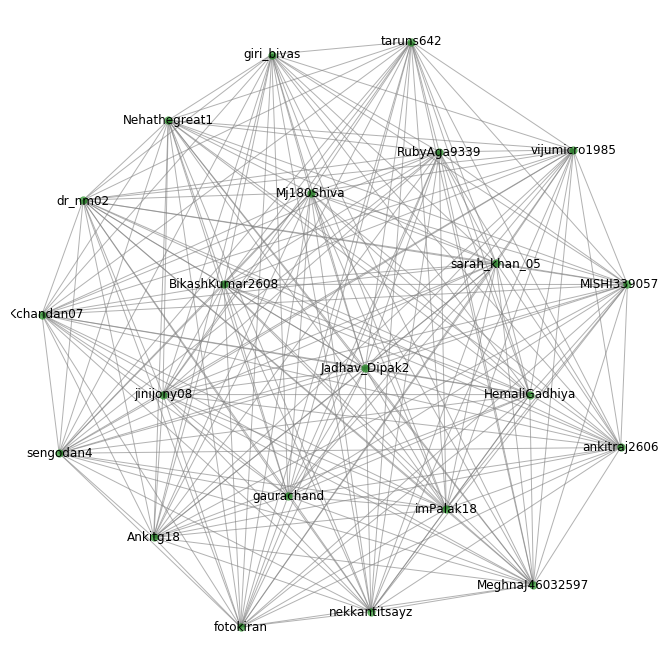

In [49]:
largest_subgraph1 = G.subgraph(cliqs[0])

labels = {}
for n in largest_subgraph1.nodes():
    labels[n] = data[data['user_id'] == n].username.iloc[0]

plt.figure(figsize = (9,9))
pos = nx.spring_layout(largest_subgraph1)
nx.draw(largest_subgraph1, pos=pos, edge_color="grey", node_color="green", linewidths=0.3, node_size=60,
        alpha=0.6, with_labels=False)
nx.draw_networkx_labels(largest_subgraph1, pos=pos, labels=labels)
plt.savefig("1st_largest_clique.png")
quick_summary_of_subgraph(largest_subgraph1, data)

,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
11,2020-04-11 05:38:48,1522183322,fotokiran,6 cars join,0,1,#contestalert #parkwheels #parking #challenge,mumbai,1522183322
24,2020-04-10 20:12:29,1155829585772261377,HemaliGadhiya,ans 6 cars join friends,1,1,#contestalert #parkwheels #parking #challenge ...,NaN,1155829585772261377
34,2020-04-10 17:15:35,332156688,Ankitg18,6 cars,0,0,#challenge #parking #parkwheels,delhi ncr,332156688
35,2020-04-10 17:14:38,2572271892,sengodan4,6 cars,1,3,#parkwheels #parking #challenge #puzzle #findt...,"kollam, india",2572271892
36,2020-04-10 17:08:22,860538705056083970,RubyAga9339,6 cars join,0,4,#contestalert #parkwheels #parking #challenge,"kolkata, india",860538705056083970
37,2020-04-10 17:06:46,947440675489906688,BikashKumar2608,6 cars join,0,0,#contestalert #parkwheels #parking #challenge,"ranchi, india",947440675489906688
65,2020-04-10 13:06:34,450515554,gaurachand,6 cars,0,1,#contestalert #parkwheels #parking #challenge,"indore, india",450515554
73,2020-04-10 11:59:56,3255544019,Jadhav_Dipak2,6 cars join,0,2,#contestalert #parkwheels #parking #challenge,india,3255544019
76,2020-04-10 11:17:04,3017860446,dr_nm02,6 cars,0,0,#contestalert #parkwheels #parking #challenge,"aurangabad, india",3017860446
84,2020-04-10 09:58:42,1210276287278796800,MISHI33905752,6 cars join,2,6,#contestalert #parkwheels #parking #challenge,NaN,1210276287278796800


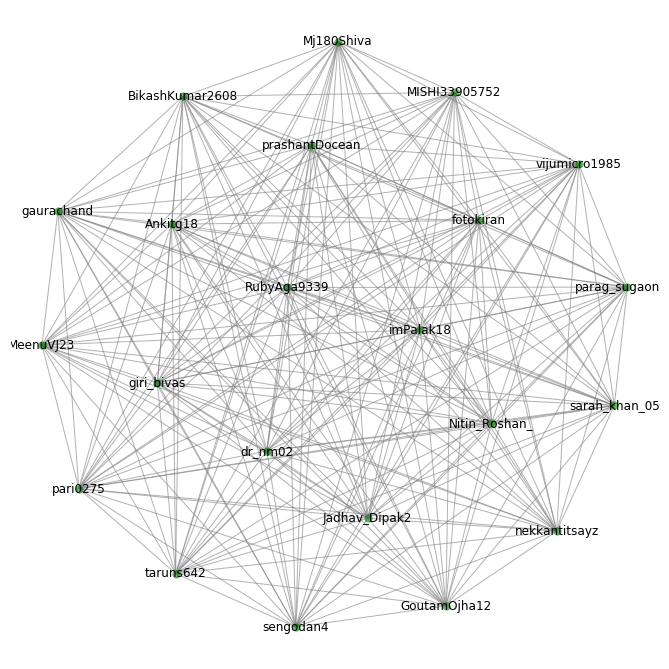

In [37]:
largest_subgraph = G.subgraph(cliqs[1])

labels = {}
for n in largest_subgraph.nodes():
    labels[n] = data[data['user_id'] == n].username.iloc[0]

plt.figure(figsize = (9,9))
pos = nx.spring_layout(largest_subgraph)
nx.draw(largest_subgraph, pos=pos, edge_color="grey", node_color="green", linewidths=0.3, node_size=60,
        alpha=0.6, with_labels=False)
nx.draw_networkx_labels(largest_subgraph, pos=pos, labels=labels)
plt.savefig('second_largest_clique.png')
plt.show()

In [31]:
data[data['user_id'].isin(largest_subgraph.nodes())]

,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
11,2020-04-11 05:38:48,1522183322,fotokiran,6 cars join,0,1,#contestalert #parkwheels #parking #challenge,mumbai,1522183322
25,2020-04-10 20:03:39,536262371,prashantDocean,found 6 cars,3,4,#contestalert #parkwheels #parking #challenge,"kolkata, india",536262371
34,2020-04-10 17:15:35,332156688,Ankitg18,6 cars,0,0,#challenge #parking #parkwheels,delhi ncr,332156688
35,2020-04-10 17:14:38,2572271892,sengodan4,6 cars,1,3,#parkwheels #parking #challenge #puzzle #findt...,"kollam, india",2572271892
36,2020-04-10 17:08:22,860538705056083970,RubyAga9339,6 cars join,0,4,#contestalert #parkwheels #parking #challenge,"kolkata, india",860538705056083970
37,2020-04-10 17:06:46,947440675489906688,BikashKumar2608,6 cars join,0,0,#contestalert #parkwheels #parking #challenge,"ranchi, india",947440675489906688
65,2020-04-10 13:06:34,450515554,gaurachand,6 cars,0,1,#contestalert #parkwheels #parking #challenge,"indore, india",450515554
73,2020-04-10 11:59:56,3255544019,Jadhav_Dipak2,6 cars join,0,2,#contestalert #parkwheels #parking #challenge,india,3255544019
76,2020-04-10 11:17:04,3017860446,dr_nm02,6 cars,0,0,#contestalert #parkwheels #parking #challenge,"aurangabad, india",3017860446
84,2020-04-10 09:58:42,1210276287278796800,MISHI33905752,6 cars join,2,6,#contestalert #parkwheels #parking #challenge,NaN,1210276287278796800


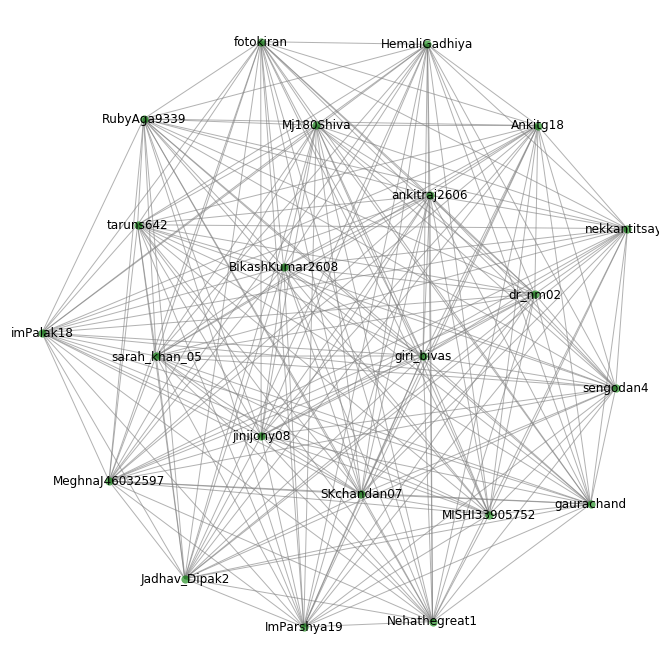

In [27]:
largest_subgraph = G.subgraph(cliqs[2])

labels = {}
for n in largest_subgraph.nodes():
    labels[n] = data[data['user_id'] == n].username.iloc[0]

plt.figure(figsize = (9,9))
pos = nx.spring_layout(largest_subgraph)
nx.draw(largest_subgraph, pos=pos, edge_color="grey", node_color="green", linewidths=0.3, node_size=60,
        alpha=0.6, with_labels=False)
nx.draw_networkx_labels(largest_subgraph, pos=pos, labels=labels)
plt.savefig("third_largest_clique.png")
plt.show()

In [28]:
data[data['user_id'].isin(largest_subgraph.nodes())]

,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
11,2020-04-11 05:38:48,1522183322,fotokiran,6 cars join,0,1,#contestalert #parkwheels #parking #challenge,mumbai,1522183322
24,2020-04-10 20:12:29,1155829585772261377,HemaliGadhiya,ans 6 cars join friends,1,1,#contestalert #parkwheels #parking #challenge ...,NaN,1155829585772261377
34,2020-04-10 17:15:35,332156688,Ankitg18,6 cars,0,0,#challenge #parking #parkwheels,delhi ncr,332156688
35,2020-04-10 17:14:38,2572271892,sengodan4,6 cars,1,3,#parkwheels #parking #challenge #puzzle #findt...,"kollam, india",2572271892
36,2020-04-10 17:08:22,860538705056083970,RubyAga9339,6 cars join,0,4,#contestalert #parkwheels #parking #challenge,"kolkata, india",860538705056083970
37,2020-04-10 17:06:46,947440675489906688,BikashKumar2608,6 cars join,0,0,#contestalert #parkwheels #parking #challenge,"ranchi, india",947440675489906688
65,2020-04-10 13:06:34,450515554,gaurachand,6 cars,0,1,#contestalert #parkwheels #parking #challenge,"indore, india",450515554
73,2020-04-10 11:59:56,3255544019,Jadhav_Dipak2,6 cars join,0,2,#contestalert #parkwheels #parking #challenge,india,3255544019
76,2020-04-10 11:17:04,3017860446,dr_nm02,6 cars,0,0,#contestalert #parkwheels #parking #challenge,"aurangabad, india",3017860446
84,2020-04-10 09:58:42,1210276287278796800,MISHI33905752,6 cars join,2,6,#contestalert #parkwheels #parking #challenge,NaN,1210276287278796800


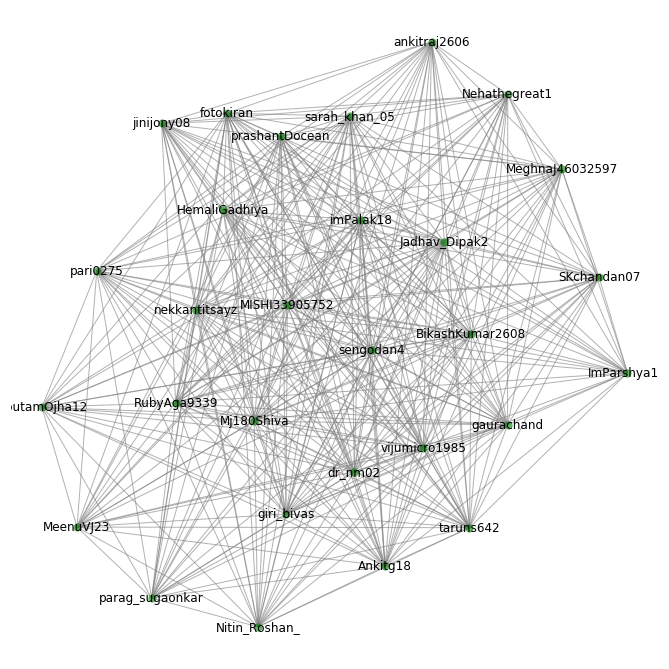

### WORDS PRESENT IN USERS' TWEETS SORTED BY OCCURRENCE COUNT (ONLY THE WORDS WITH COUNT > 1) ###
{'6': 29, 'cars': 29, 'join': 17, '': 16, 'ans': 4, 'tagging': 4, 'total': 3, 'friends': 2, 'found': 2}

### LOCATIONS PRESENT IN USERS' TWEETS SORTED BY OCCURRENCE COUNT ###
[(nan, 4), ('kolkata, india', 2), ('hyderabad, india', 2), ('india', 2), ('indore, india', 2), ('ranchi, india', 1), ('rajasthan, india', 1), ('dahisar east, mumbai', 1), ('देवघर ', 1), ('chennai, india', 1), ('delhi ncr', 1), ('kollam, india', 1), ('ahmedabad', 1), ('bengaluru, india', 1), ('mumbai', 1), ('indai', 1), ('mumbai, india', 1), ('aurangabad, india', 1), ('kolkata', 1), ('मुंबई, भारत', 1), ('pune, india', 1), ('karnal, haryana', 1)]

### HASHTAG OCCURENCES (ONLY THE HASHTAGS WITH COUNT > 1) ###
{'#parkwheels': 29, '#parking': 29, '#challenge': 29, '#contestalert': 19, '#puzzle': 15, '#findthecar': 15, '#findpuzzle': 15, '#contest': 15, '#contesttime': 15}

### TWEETS ###


,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
11,2020-04-11 05:38:48,1522183322,fotokiran,6 cars join,0,1,#contestalert #parkwheels #parking #challenge,mumbai,1522183322
24,2020-04-10 20:12:29,1155829585772261377,HemaliGadhiya,ans 6 cars join friends,1,1,#contestalert #parkwheels #parking #challenge ...,NaN,1155829585772261377
25,2020-04-10 20:03:39,536262371,prashantDocean,found 6 cars,3,4,#contestalert #parkwheels #parking #challenge,"kolkata, india",536262371
34,2020-04-10 17:15:35,332156688,Ankitg18,6 cars,0,0,#challenge #parking #parkwheels,delhi ncr,332156688
35,2020-04-10 17:14:38,2572271892,sengodan4,6 cars,1,3,#parkwheels #parking #challenge #puzzle #findt...,"kollam, india",2572271892
36,2020-04-10 17:08:22,860538705056083970,RubyAga9339,6 cars join,0,4,#contestalert #parkwheels #parking #challenge,"kolkata, india",860538705056083970
37,2020-04-10 17:06:46,947440675489906688,BikashKumar2608,6 cars join,0,0,#contestalert #parkwheels #parking #challenge,"ranchi, india",947440675489906688
65,2020-04-10 13:06:34,450515554,gaurachand,6 cars,0,1,#contestalert #parkwheels #parking #challenge,"indore, india",450515554
73,2020-04-10 11:59:56,3255544019,Jadhav_Dipak2,6 cars join,0,2,#contestalert #parkwheels #parking #challenge,india,3255544019
76,2020-04-10 11:17:04,3017860446,dr_nm02,6 cars,0,0,#contestalert #parkwheels #parking #challenge,"aurangabad, india",3017860446


In [50]:
#K-core
largest_subgraph = nx.k_core(G)

labels = {}
for n in largest_subgraph.nodes():
    labels[n] = data[data['user_id'] == n].username.iloc[0]

plt.figure(figsize = (9,9))
pos = nx.spring_layout(largest_subgraph)
nx.draw(largest_subgraph, pos=pos, edge_color="grey", node_color="green", linewidths=0.3, node_size=60,
        alpha=0.6, with_labels=False)
nx.draw_networkx_labels(largest_subgraph, pos=pos, labels=labels)
plt.savefig('largest_subgraph.png')
plt.show()
quick_summary_of_subgraph(largest_subgraph, data)

,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
11,2020-04-11 05:38:48,1522183322,fotokiran,6 cars join,0,1,#contestalert #parkwheels #parking #challenge,mumbai,1522183322
24,2020-04-10 20:12:29,1155829585772261377,HemaliGadhiya,ans 6 cars join friends,1,1,#contestalert #parkwheels #parking #challenge ...,NaN,1155829585772261377
25,2020-04-10 20:03:39,536262371,prashantDocean,found 6 cars,3,4,#contestalert #parkwheels #parking #challenge,"kolkata, india",536262371
34,2020-04-10 17:15:35,332156688,Ankitg18,6 cars,0,0,#challenge #parking #parkwheels,delhi ncr,332156688
35,2020-04-10 17:14:38,2572271892,sengodan4,6 cars,1,3,#parkwheels #parking #challenge #puzzle #findt...,"kollam, india",2572271892
36,2020-04-10 17:08:22,860538705056083970,RubyAga9339,6 cars join,0,4,#contestalert #parkwheels #parking #challenge,"kolkata, india",860538705056083970
37,2020-04-10 17:06:46,947440675489906688,BikashKumar2608,6 cars join,0,0,#contestalert #parkwheels #parking #challenge,"ranchi, india",947440675489906688
65,2020-04-10 13:06:34,450515554,gaurachand,6 cars,0,1,#contestalert #parkwheels #parking #challenge,"indore, india",450515554
73,2020-04-10 11:59:56,3255544019,Jadhav_Dipak2,6 cars join,0,2,#contestalert #parkwheels #parking #challenge,india,3255544019
76,2020-04-10 11:17:04,3017860446,dr_nm02,6 cars,0,0,#contestalert #parkwheels #parking #challenge,"aurangabad, india",3017860446


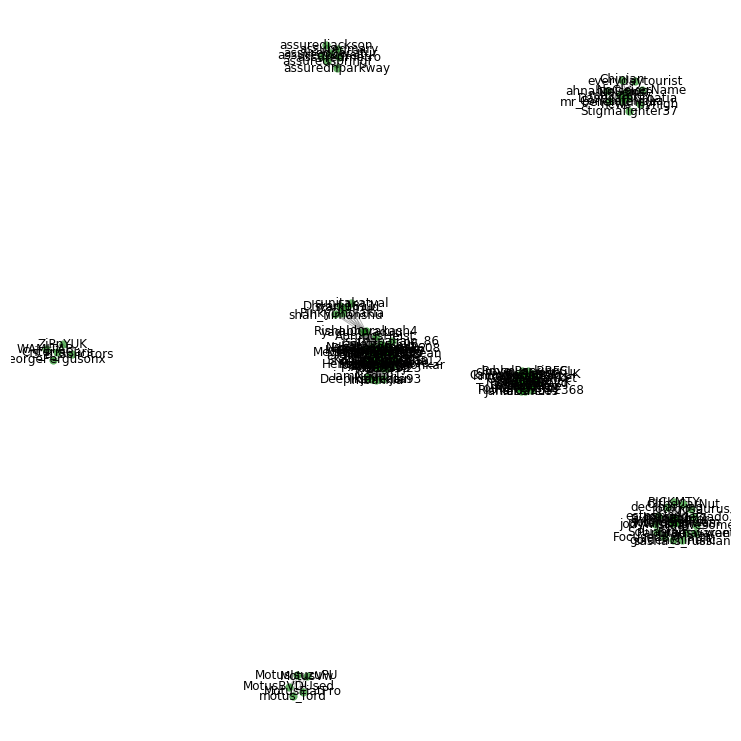

In [35]:
#K-core 2
largest_subgraphg = nx.k_core(G, 4)

labels = {}
for n in largest_subgraphg.nodes():
    labels[n] = data[data['user_id'] == n].username.iloc[0]

plt.figure(figsize = (10,10))
pos = nx.spring_layout(largest_subgraphg)
nx.draw(largest_subgraphg, pos=pos, edge_color="grey", node_color="green", linewidths=0.3, node_size=60,
        alpha=0.6, with_labels=False)
nx.draw_networkx_labels(largest_subgraphg, pos=pos, labels=labels)
plt.savefig('largest_subgraph.png')
plt.show()

### WORDS PRESENT IN USERS' TWEETS SORTED BY OCCURRENCE COUNT (ONLY THE WORDS WITH COUNT > 1) ###
{'': 92, 'cars': 51, '6': 37, 'free': 27, 'car': 25, 'parking': 22, 'join': 21, 'new': 20, 'bike': 18, 's': 18, 'york': 18, 'people': 15, 'public': 15, 'still': 12, 'spaces': 12, 'city': 11, 'airport': 11, 'us': 10, 'alicante': 10, 'would': 9, 'amp': 9, 'space': 9, 'street': 9, 'cost': 9, 'ans': 8, 'like': 8, 'park': 8, 'get': 8, 'time': 8, 'biz': 8, 'lot': 8, 'one': 7, 'even': 7, 'could': 7, 'seattle': 7, 'lanes': 7, 'nt': 7, 'paid': 7, 'travel': 7, 'hidden': 6, 'something': 6, 'subsidized': 6, 'part': 6, 'fact': 6, 'royal': 6, 'know': 6, 'work': 6, 'every': 6, 'store': 6, 'n': 6, 'eastlake': 6, 'paying': 6, 'row': 6, 'found': 5, 'tagging': 5, 'think': 5, 'rack': 5, 'streets': 5, 'services': 5, 'make': 5, 'must': 5, 'caravan': 5, 'drive': 5, 'checks': 5, 'notes': 5, 'abandon': 5, 'fares': 5, 'save': 5, 'total': 4, 'tag': 4, 'lots': 4, 'build': 4, 'almost': 4, 'problem': 4, 'required': 4, 

,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
11,2020-04-11 05:38:48,1522183322,fotokiran,6 cars join,0,1,#contestalert #parkwheels #parking #challenge,mumbai,1522183322
24,2020-04-10 20:12:29,1155829585772261377,HemaliGadhiya,ans 6 cars join friends,1,1,#contestalert #parkwheels #parking #challenge ...,NaN,1155829585772261377
25,2020-04-10 20:03:39,536262371,prashantDocean,found 6 cars,3,4,#contestalert #parkwheels #parking #challenge,"kolkata, india",536262371
34,2020-04-10 17:15:35,332156688,Ankitg18,6 cars,0,0,#challenge #parking #parkwheels,delhi ncr,332156688
35,2020-04-10 17:14:38,2572271892,sengodan4,6 cars,1,3,#parkwheels #parking #challenge #puzzle #findt...,"kollam, india",2572271892
36,2020-04-10 17:08:22,860538705056083970,RubyAga9339,6 cars join,0,4,#contestalert #parkwheels #parking #challenge,"kolkata, india",860538705056083970
37,2020-04-10 17:06:46,947440675489906688,BikashKumar2608,6 cars join,0,0,#contestalert #parkwheels #parking #challenge,"ranchi, india",947440675489906688
40,2020-04-10 16:56:17,1056062613237379072,yadu00yaduu,six cars join guys,0,0,#contestalert #parkwheels #parking #challenge ...,NaN,1056062613237379072
43,2020-04-10 16:30:15,1590405854,Rishabhprakash4,six cars join,0,0,#contestalert #parkwheels #parking #challenge ...,delhi,1590405854
65,2020-04-10 13:06:34,450515554,gaurachand,6 cars,0,1,#contestalert #parkwheels #parking #challenge,"indore, india",450515554


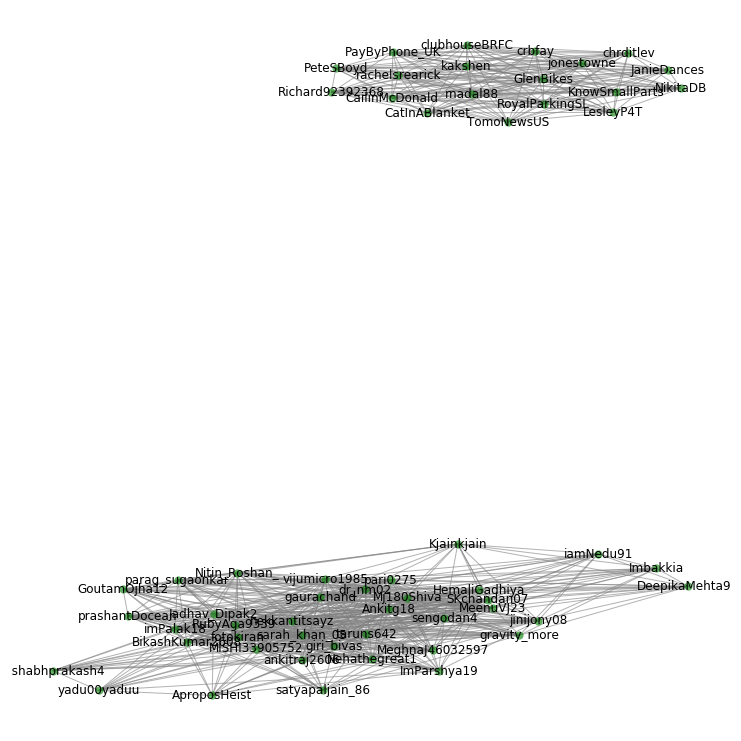

In [52]:
#K-core 3
largest_subgraphg2 = nx.k_core(G, 10)

labels = {}
for n in largest_subgraphg2.nodes():
    labels[n] = data[data['user_id'] == n].username.iloc[0]

plt.figure(figsize = (10,10))
pos = nx.spring_layout(largest_subgraphg2)
nx.draw(largest_subgraphg2, pos=pos, edge_color="grey", node_color="green", linewidths=0.3, node_size=60,
        alpha=0.6, with_labels=False)
nx.draw_networkx_labels(largest_subgraphg2, pos=pos, labels=labels)
plt.savefig('largest_subgraph.png')
quick_summary_of_subgraph(largest_subgraphg2, data)

### WORDS PRESENT IN USERS' TWEETS SORTED BY OCCURRENCE COUNT (ONLY THE WORDS WITH COUNT > 1) ###
{'': 92, 'cars': 49, '6': 36, 'free': 27, 'car': 25, 'parking': 22, 'new': 20, 'join': 18, 'bike': 18, 's': 18, 'york': 18, 'people': 15, 'public': 15, 'still': 12, 'spaces': 12, 'city': 11, 'airport': 11, 'us': 10, 'alicante': 10, 'would': 9, 'amp': 9, 'space': 9, 'street': 9, 'cost': 9, 'ans': 8, 'like': 8, 'park': 8, 'get': 8, 'time': 8, 'biz': 8, 'lot': 8, 'one': 7, 'even': 7, 'could': 7, 'seattle': 7, 'lanes': 7, 'nt': 7, 'paid': 7, 'travel': 7, 'hidden': 6, 'something': 6, 'subsidized': 6, 'part': 6, 'fact': 6, 'royal': 6, 'know': 6, 'work': 6, 'every': 6, 'store': 6, 'n': 6, 'eastlake': 6, 'paying': 6, 'row': 6, 'found': 5, 'tagging': 5, 'think': 5, 'rack': 5, 'streets': 5, 'services': 5, 'make': 5, 'must': 5, 'caravan': 5, 'drive': 5, 'checks': 5, 'notes': 5, 'abandon': 5, 'fares': 5, 'save': 5, 'total': 4, 'tag': 4, 'lots': 4, 'build': 4, 'almost': 4, 'problem': 4, 'required': 4, 

,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
11,2020-04-11 05:38:48,1522183322,fotokiran,6 cars join,0,1,#contestalert #parkwheels #parking #challenge,mumbai,1522183322
24,2020-04-10 20:12:29,1155829585772261377,HemaliGadhiya,ans 6 cars join friends,1,1,#contestalert #parkwheels #parking #challenge ...,NaN,1155829585772261377
25,2020-04-10 20:03:39,536262371,prashantDocean,found 6 cars,3,4,#contestalert #parkwheels #parking #challenge,"kolkata, india",536262371
34,2020-04-10 17:15:35,332156688,Ankitg18,6 cars,0,0,#challenge #parking #parkwheels,delhi ncr,332156688
35,2020-04-10 17:14:38,2572271892,sengodan4,6 cars,1,3,#parkwheels #parking #challenge #puzzle #findt...,"kollam, india",2572271892
36,2020-04-10 17:08:22,860538705056083970,RubyAga9339,6 cars join,0,4,#contestalert #parkwheels #parking #challenge,"kolkata, india",860538705056083970
37,2020-04-10 17:06:46,947440675489906688,BikashKumar2608,6 cars join,0,0,#contestalert #parkwheels #parking #challenge,"ranchi, india",947440675489906688
65,2020-04-10 13:06:34,450515554,gaurachand,6 cars,0,1,#contestalert #parkwheels #parking #challenge,"indore, india",450515554
73,2020-04-10 11:59:56,3255544019,Jadhav_Dipak2,6 cars join,0,2,#contestalert #parkwheels #parking #challenge,india,3255544019
76,2020-04-10 11:17:04,3017860446,dr_nm02,6 cars,0,0,#contestalert #parkwheels #parking #challenge,"aurangabad, india",3017860446


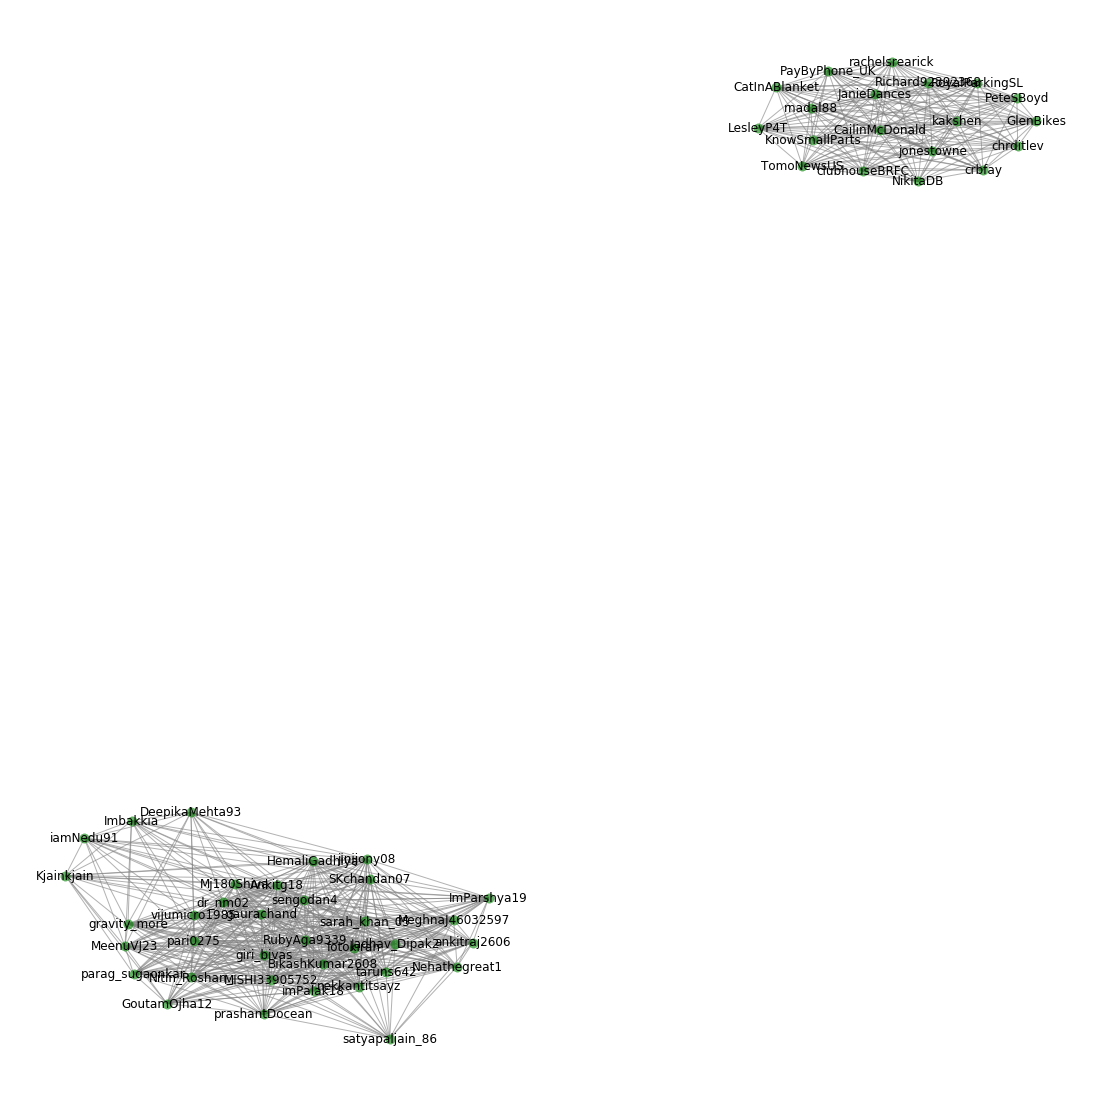

In [53]:
#K-core 4
largest_subgraphg3 = nx.k_core(G, 15)

labels = {}
for n in largest_subgraphg3.nodes():
    labels[n] = data[data['user_id'] == n].username.iloc[0]

plt.figure(figsize = (15,15))
pos = nx.spring_layout(largest_subgraphg3)
nx.draw(largest_subgraphg3, pos=pos, edge_color="grey", node_color="green", linewidths=0.3, node_size=90,
        alpha=0.6, with_labels=False)
nx.draw_networkx_labels(largest_subgraphg3, pos=pos, labels=labels)
plt.savefig('largest_subgraph.png')
quick_summary_of_subgraph(largest_subgraphg3, data)

### WORDS PRESENT IN USERS' TWEETS SORTED BY OCCURRENCE COUNT (ONLY THE WORDS WITH COUNT > 1) ###
{'': 92, 'cars': 44, '6': 31, 'free': 27, 'car': 25, 'parking': 22, 'new': 20, 'bike': 18, 's': 18, 'york': 18, 'join': 17, 'people': 15, 'public': 15, 'still': 12, 'spaces': 12, 'city': 11, 'airport': 11, 'us': 10, 'alicante': 10, 'would': 9, 'amp': 9, 'space': 9, 'street': 9, 'cost': 9, 'like': 8, 'park': 8, 'get': 8, 'time': 8, 'biz': 8, 'lot': 8, 'one': 7, 'even': 7, 'could': 7, 'seattle': 7, 'lanes': 7, 'nt': 7, 'paid': 7, 'travel': 7, 'something': 6, 'subsidized': 6, 'part': 6, 'fact': 6, 'royal': 6, 'know': 6, 'work': 6, 'every': 6, 'store': 6, 'n': 6, 'eastlake': 6, 'paying': 6, 'row': 6, 'think': 5, 'rack': 5, 'streets': 5, 'services': 5, 'make': 5, 'must': 5, 'caravan': 5, 'drive': 5, 'checks': 5, 'notes': 5, 'abandon': 5, 'fares': 5, 'save': 5, 'ans': 4, 'found': 4, 'tagging': 4, 'lots': 4, 'build': 4, 'almost': 4, 'problem': 4, 'required': 4, 'enforcement': 4, 'protected': 4, '

,time,user_id,username,text,retweets,favorites,tweet_hashtags,location,user_id_str
11,2020-04-11 05:38:48,1522183322,fotokiran,6 cars join,0,1,#contestalert #parkwheels #parking #challenge,mumbai,1522183322
24,2020-04-10 20:12:29,1155829585772261377,HemaliGadhiya,ans 6 cars join friends,1,1,#contestalert #parkwheels #parking #challenge ...,NaN,1155829585772261377
25,2020-04-10 20:03:39,536262371,prashantDocean,found 6 cars,3,4,#contestalert #parkwheels #parking #challenge,"kolkata, india",536262371
34,2020-04-10 17:15:35,332156688,Ankitg18,6 cars,0,0,#challenge #parking #parkwheels,delhi ncr,332156688
35,2020-04-10 17:14:38,2572271892,sengodan4,6 cars,1,3,#parkwheels #parking #challenge #puzzle #findt...,"kollam, india",2572271892
36,2020-04-10 17:08:22,860538705056083970,RubyAga9339,6 cars join,0,4,#contestalert #parkwheels #parking #challenge,"kolkata, india",860538705056083970
37,2020-04-10 17:06:46,947440675489906688,BikashKumar2608,6 cars join,0,0,#contestalert #parkwheels #parking #challenge,"ranchi, india",947440675489906688
65,2020-04-10 13:06:34,450515554,gaurachand,6 cars,0,1,#contestalert #parkwheels #parking #challenge,"indore, india",450515554
73,2020-04-10 11:59:56,3255544019,Jadhav_Dipak2,6 cars join,0,2,#contestalert #parkwheels #parking #challenge,india,3255544019
76,2020-04-10 11:17:04,3017860446,dr_nm02,6 cars,0,0,#contestalert #parkwheels #parking #challenge,"aurangabad, india",3017860446


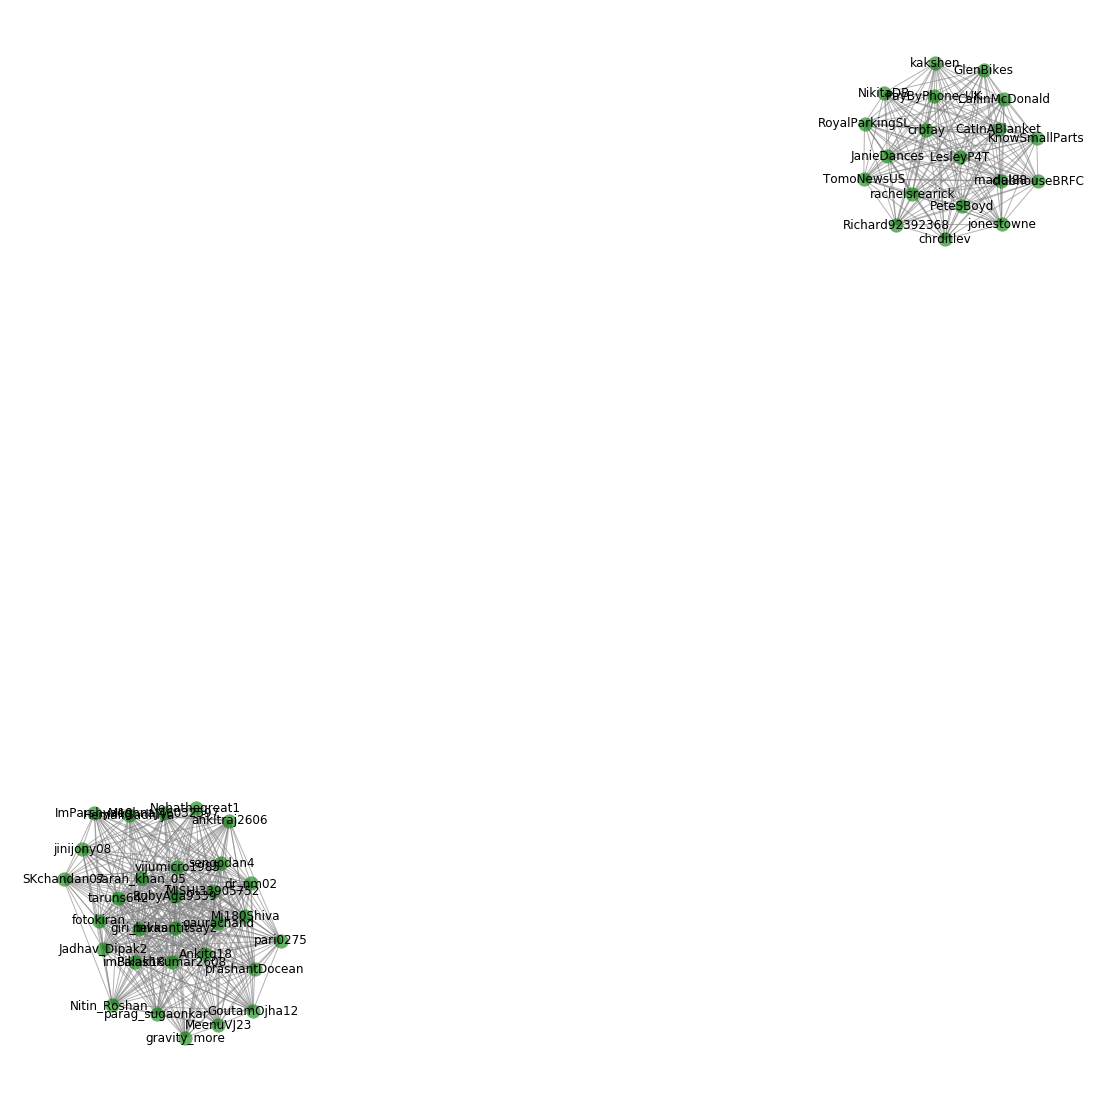

In [54]:
#K-core 5
largest_subgraphg4 = nx.k_core(G, 17)

labels = {}
for n in largest_subgraphg4.nodes():
    labels[n] = data[data['user_id'] == n].username.iloc[0]

plt.figure(figsize = (15,15))
pos = nx.spring_layout(largest_subgraphg4)
nx.draw(largest_subgraphg4, pos=pos, edge_color="grey", node_color="green", linewidths=0.3, width=1, node_size=190,
        alpha=0.6, with_labels=False,font_size=32)
nx.draw_networkx_labels(largest_subgraphg4, pos=pos, labels=labels)
plt.savefig('largest_subgraphg4.png')
quick_summary_of_subgraph(largest_subgraphg4, data)

In [19]:
# Listing the iterator from Girvan Newman, because we can't draw it

G = nx.read_gpickle("Our_Gragh_0.4Sim")
k = 4

comp = community.girvan_newman(G)
tuple(sorted(c) for c in next(comp))


([72828162,
  88129814,
  124517092,
  142294425,
  232038528,
  332156688,
  447695333,
  450515554,
  490012948,
  526184989,
  536262371,
  616000350,
  890875417,
  1252026529,
  1522183322,
  1590405854,
  1652075268,
  1970293994,
  2168195778,
  2572271892,
  2703641316,
  3001390075,
  3017860446,
  3255544019,
  3307718191,
  802178510207025152,
  858735005006213122,
  860538705056083970,
  917297369263362049,
  922999217160720384,
  943171207762927616,
  947307482770153472,
  947440675489906688,
  1032933344726605824,
  1056062613237379072,
  1109174739669401602,
  1111675390324404224,
  1136495538751397888,
  1142063381232283650,
  1155829585772261377,
  1158989223044603904,
  1171789465162932224,
  1195054295999074304,
  1210276287278796800,
  1223113699478556673,
  1232155497203216385],
 [14535013,
  15219730,
  15593359,
  17154051,
  20518378,
  21428992,
  22996639,
  23052569,
  23155854,
  23219195,
  25048808,
  29641228,
  31386487,
  33005796,
  34047942,
  3696489